In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import preprocess_utils as prep

In [2]:
data = prep.read_iob_file(os.path.join("datasets", "conll2003", "train.txt"))
data.keys()

dict_keys(['tokens', 'pos_tags', 'chunk_tags', 'entity_tags'])

In [3]:
df = pd.DataFrame(data, columns=["tokens", "entity_tags"])
df.head()

,tokens,entity_tags
0,"[EU, rejects, German, call, to, boycott, Briti...","[B-ORG, O, B-MISC, O, O, O, B-MISC, O, O]"
1,"[Peter, Blackburn]","[B-PER, I-PER]"
2,"[BRUSSELS, 1996-08-22]","[B-LOC, O]"
3,"[The, European, Commission, said, on, Thursday...","[O, B-ORG, I-ORG, O, O, O, O, O, O, B-MISC, O,..."
4,"[Germany, 's, representative, to, the, Europea...","[B-LOC, O, O, O, O, B-ORG, I-ORG, O, O, O, B-P..."


In [4]:
print(f"Number of sentences: {df.shape[0]}")

Number of sentences: 14041


In [13]:
print(f"Number of unique words: len(df["tokens"].explode().unique()))

array(['EU', 'rejects', 'German', ..., 'Swe', 'Bradley', 'Hughes'],
      dtype=object)

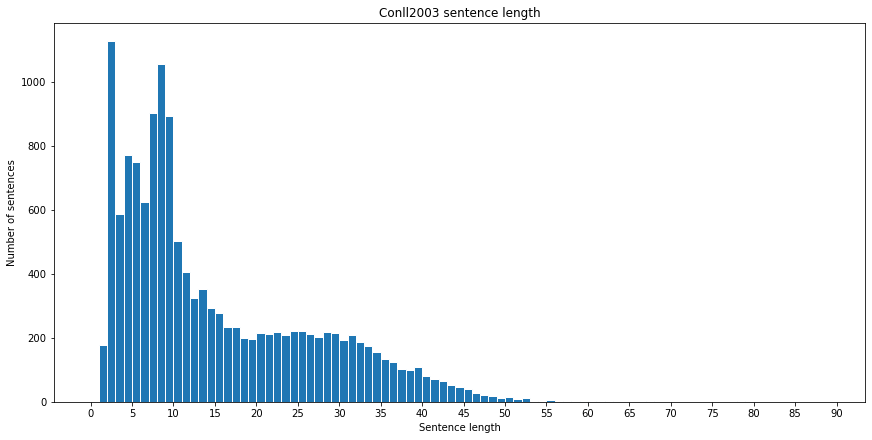

In [11]:
sentence_length = df["tokens"].map(lambda sentence: len(sentence))

fig, ax = plt.subplots(figsize=(12, 6), layout="constrained")
ax.hist(sentence_length, bins=np.arange(90), edgecolor="white")
ax.set_xlabel("Sentence length")
ax.set_ylabel("Number of sentences")
ax.set_title("Conll2003 sentence length")
ax.set_xticks(np.arange(0, 95, 5))
plt.show();

In [6]:
print(f"Mean sentence length: {sentence_length.mean():.2f}")

Mean sentence length: 14.50


In [7]:
unique_entity_tags = df["entity_tags"].explode().unique()
print("Unique entity tags:")
for tag in sorted(unique_entity_tags):
    print(f"  -> {tag}")

Unique entity tags:
  -> B-LOC
  -> B-MISC
  -> B-ORG
  -> B-PER
  -> I-LOC
  -> I-MISC
  -> I-ORG
  -> I-PER
  -> O


In [8]:
entity_tags = set(unique_entity_tags)
entity_tags.difference_update("O")
entity_tags

{'B-LOC', 'B-MISC', 'B-ORG', 'B-PER', 'I-LOC', 'I-MISC', 'I-ORG', 'I-PER'}

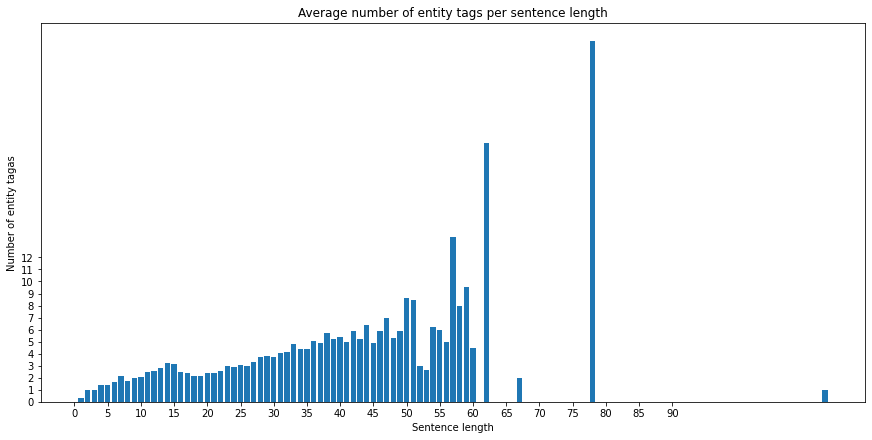

In [9]:
def count_entity_tags_per_sentence(sentence_entity_tags):
    def is_valid(entity_tag):
        return entity_tag in entity_tags
    
    valid_entity_tags = list(filter(is_valid, sentence_entity_tags))
    return len(valid_entity_tags)

num_entity_tags_per_sentence = df["entity_tags"].map(count_entity_tags_per_sentence)
avg_entity_tags_per_sentence_length = pd.DataFrame(
    {
        "sentence_length": sentence_length,
        "num_entity_tags": num_entity_tags_per_sentence
    }
).groupby("sentence_length").mean()

fig, ax = plt.subplots(figsize=(12, 6), layout="constrained")
ax.bar(
    avg_entity_tags_per_sentence_length.index,
    avg_entity_tags_per_sentence_length["num_entity_tags"]
)
ax.set_xticks(np.arange(0, 95, 5))
ax.set_yticks(np.arange(0, 13))
ax.set_xlabel("Sentence length")
ax.set_ylabel("Number of entity tagas")
ax.set_title("Average number of entity tags per sentence length")
plt.show()

B-LOC     7140
B-PER     6600
B-ORG     6321
I-PER     4528
I-ORG     3704
B-MISC    3438
I-LOC     1157
I-MISC    1155
Name: entity_tags, dtype: int64


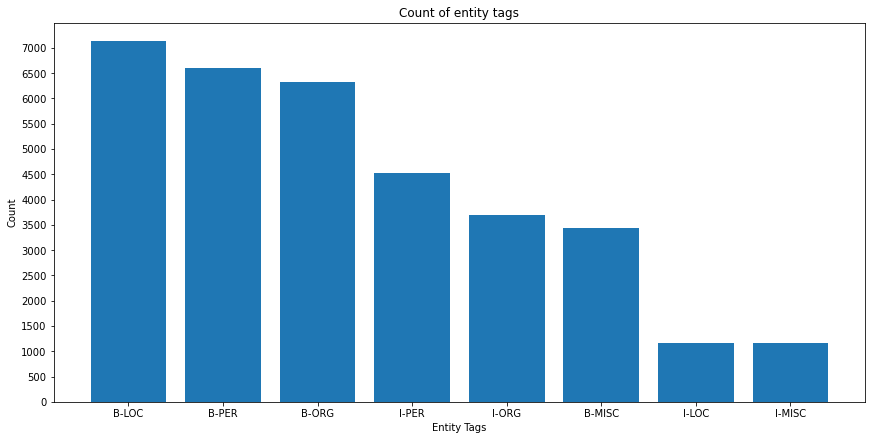

In [10]:
flatten_entity_tags = df["entity_tags"].explode()
valid_entity_tags = flatten_entity_tags[flatten_entity_tags.isin(entity_tags)]
count_entity_tags = valid_entity_tags.value_counts()
print(count_entity_tags)

fig, ax = plt.subplots(figsize=(12, 6), layout="constrained")
xticks = np.arange(len(count_entity_tags.index))
ax.bar(
    xticks,
    count_entity_tags
)
ax.set_xticks(xticks, count_entity_tags.index)
ax.set_yticks(np.arange(0, 7500, 500))
ax.set_xlabel("Entity Tags")
ax.set_ylabel("Count")
ax.set_title("Count of entity tags")
plt.show()